2024-01-03 15:24:03.459040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 15:24:03.459100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 15:24:03.460319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 15:24:04.284841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False


Iterations: 100%|██████████| 500/500 [00:01<00:00, 441.06it/s]


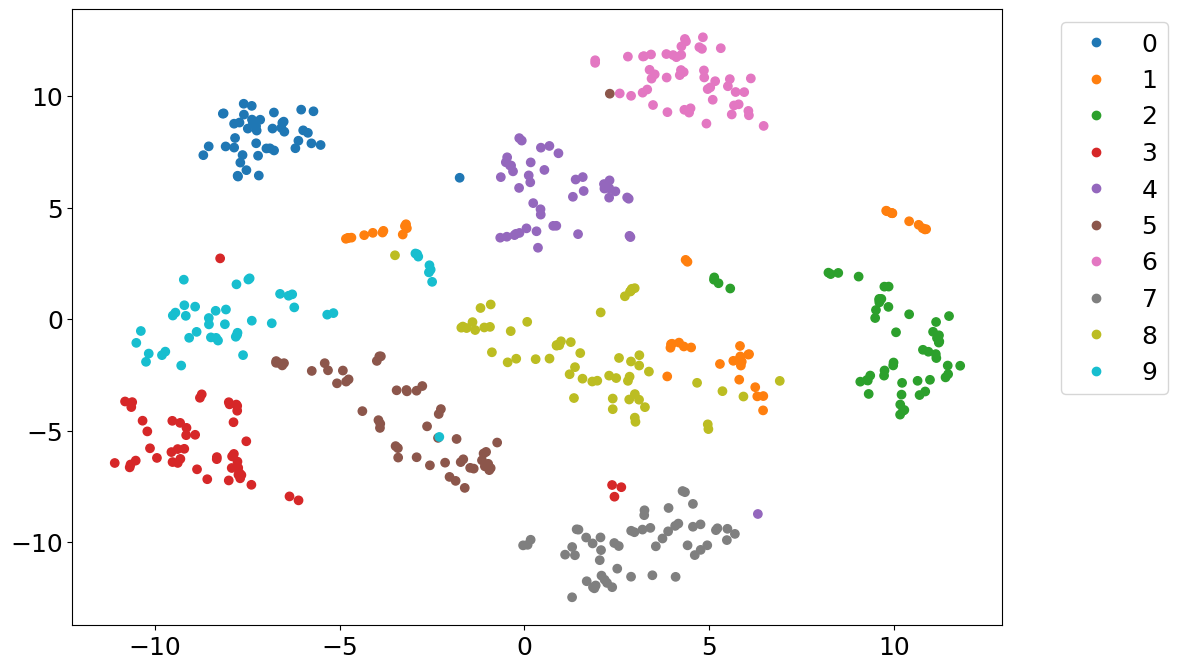

No GPU devices available. Using CPU.


TypeError: cannot reshape array of shape (500, 2) (size 1000) into shape (-1, 8, 8, 1) because the product of specified axis sizes (64) does not evenly divide 1000

In [1]:
import tsnejax
import tsnenumpy
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

import os

# Set the XLA_FLAGS environment variable
os.environ['XLA_FLAGS'] = '--xla_gpu_strict_conv_algorithm_picker=false'

# Now you can run your code that triggers the cuDNN error


# Define constant synthetic cluster data with more clusters
num_clusters = 5
cluster_size = 100
data = np.vstack([np.random.randn(cluster_size, 2) + i * 2 for i in range(num_clusters)])

# Best perplexity chosen from the previous hyperparameter search
best_perplexity = 30

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_jax = tsnejax.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_time = end_time_custom - start_time_custom

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_numpy = tsnenumpy.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_numpy_time = end_time_custom - start_time_custom


# Record the start time for the scikit-learn t-SNE implementation
start_time_sklearn = time.time()

# Apply t-SNE using scikit-learn for comparison
tsne = TSNE(n_components=2, perplexity=best_perplexity, random_state=0)
Y_sklearn = tsne.fit_transform(data)

# Calculate the execution time for the scikit-learn t-SNE implementation
end_time_sklearn = time.time()
sklearn_tsne_time = end_time_sklearn - start_time_sklearn

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot the original data
axes[0].scatter(data[:, 0], data[:, 1], 20, range(len(data)))
axes[0].set_title('Original Data')
axes[0].grid(True)

# Plot the jax t-SNE results with the best perplexity
axes[1].scatter(Y_custom_numpy[:, 0], Y_custom_numpy[:, 1], 20, range(len(Y_custom_numpy)))
axes[1].set_title(f'Numpy t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[1].grid(True)

# Plot the numpy t-SNE results with the best perplexity
axes[2].scatter(Y_custom_jax[:, 0], Y_custom_jax[:, 1], 20, range(len(Y_custom_jax)))
axes[2].set_title(f'JAX t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[2].grid(True)

# Plot scikit-learn t-SNE results with the same perplexity
axes[3].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], 20, range(len(Y_sklearn)))
axes[3].set_title(f'Scikit-learn t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[3].grid(True)

# Display the subplots
plt.tight_layout()
plt.show()
# Print the execution times
print(f"Custom t-SNE JAX Execution Time: {custom_tsne_time} seconds")
print(f"Custom t-SNE Numpy Execution Time: {custom_tsne_numpy_time} seconds")
print(f"Scikit-learn t-SNE Execution Time: {sklearn_tsne_time} seconds")



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import numpy as np
import time
import tsnejax  # Ensure tsnejax is installed in your environment

rcParams["font.size"] = 18
rcParams["figure.figsize"] = (24, 8)  # Adjusted for side-by-side plots

# Load digits dataset
digits, digit_class = load_digits(return_X_y=True)
print(f"Original digits dataset shape: {digits.shape}")

# Define the size of the subset for t-SNE
subset_size = 500  # You can change this value as needed

# Select a random subset of the data
rand_idx = np.random.choice(np.arange(digits.shape[0]), size=subset_size, replace=False)
data = digits[rand_idx, :].copy()
classes = digit_class[rand_idx]

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3)

# First plot with tsnejax using NTK
start_time = time.time()
low_dim_ntk = tsnejax.compute_low_dimensional_embedding(data, 2, 30, 500, 100, pbar=True, use_ntk=True)
end_time = time.time()
execution_time_ntk = end_time - start_time
print(f"t-SNE with NTK execution time: {execution_time_ntk:.2f} seconds")
scatter_ntk = axes[0].scatter(low_dim_ntk[:, 0], low_dim_ntk[:, 1], cmap="tab10", c=classes)
axes[0].set_title(f'NTK t-SNE (Time: {execution_time_ntk:.2f}s)')

# Second plot with tsnejax without NTK
start_time = time.time()
low_dim_no_ntk = tsnejax.compute_low_dimensional_embedding(data, 2, 30, 500, 100, pbar=True, use_ntk=False)
end_time = time.time()
execution_time_no_ntk = end_time - start_time
print(f"Standard t-SNE (tsnejax) execution time: {execution_time_no_ntk:.2f} seconds")
scatter_no_ntk = axes[1].scatter(low_dim_no_ntk[:, 0], low_dim_no_ntk[:, 1], cmap="tab10", c=classes)
axes[1].set_title(f'Standard t-SNE (tsnejax) (Time: {execution_time_no_ntk:.2f}s)')

# Third plot with sklearn TSNE
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, learning_rate=100)
low_dim_sklearn = tsne.fit_transform(data)
end_time = time.time()
execution_time_sklearn = end_time - start_time
print(f"Standard t-SNE (sklearn) execution time: {execution_time_sklearn:.2f} seconds")
scatter_sklearn = axes[2].scatter(low_dim_sklearn[:, 0], low_dim_sklearn[:, 1], cmap="tab10", c=classes)
axes[2].set_title(f'Standard t-SNE (sklearn) (Time: {execution_time_sklearn:.2f}s)')

plt.show()


2024-01-03 13:28:50.818490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 13:28:50.818547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 13:28:50.819809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 13:28:51.824130: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-03 13:28:59.458817: W external/xla/xla/service/gpu/conv_algorithm_picker.cc:810] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.
2024-01-03 13:28:59.458863: W external/xla/xla/service/gpu/conv_

XlaRuntimeError: UNKNOWN: Failed to determine best cudnn convolution algorithm for:
%cudnn-conv = (f32[16000,2,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[16000,2,8,8]{3,2,1,0} %bitcast.225, f32[2,1,3,3]{3,2,1,0} %broadcast.780), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=2, custom_call_target="__cudnn$convForward", metadata={op_name="jit(all_sym_affinities)/jit(main)/while/body/jit(pairwise_affinities)/cond/branch_1_fun/jit(compute_probabilities_from_ntk)/conv_general_dilated[window_strides=(1, 1) padding=((1, 1), (1, 1)) lhs_dilation=(1, 1) rhs_dilation=(1, 1) dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 1, 2, 3), rhs_spec=(0, 1, 2, 3), out_spec=(0, 1, 2, 3)) feature_group_count=2 batch_group_count=1 precision=None preferred_element_type=None]" source_file="/home/rajesh/.virtualenvs/tsnejaxproject/lib/python3.11/site-packages/neural_tangents/_src/stax/linear.py" source_line=3131}, backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}

Original error: INTERNAL: All algorithms tried for (f32[16000,2,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[16000,2,8,8]{3,2,1,0}, f32[2,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=2, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} failed. Falling back to default algorithm.  Per-algorithm errors:
  Profiling failure on cuDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng53{k2=5,k13=1,k14=2,k18=1,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=4,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=3,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=0,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=2,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=2,k4=1,k5=0,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=1,k4=2,k5=1,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{k2=1,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=0,k4=2,k5=1,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng34{k2=1,k4=3,k5=1,k6=0,k7=0,k19=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng6{}: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng1{k2=2,k3=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng12{k5=1,k6=0,k7=1,k10=1}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng12{k5=1,k6=0,k7=1,k10=0}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng4{}: UNKNOWN: CUDNN_STATUS_INTERNAL_ERROR
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng1{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng28{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng53{k2=5,k13=1,k14=2,k18=0,k23=0}: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'
  Profiling failure on cuDNN engine eng3{k11=2}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in external/xla/xla/stream_executor/cuda/cuda_dnn.cc(8105): 'status'

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.

what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False
what: use_ntk
False


Iterations: 100%|██████████| 500/500 [00:01<00:00, 443.94it/s]


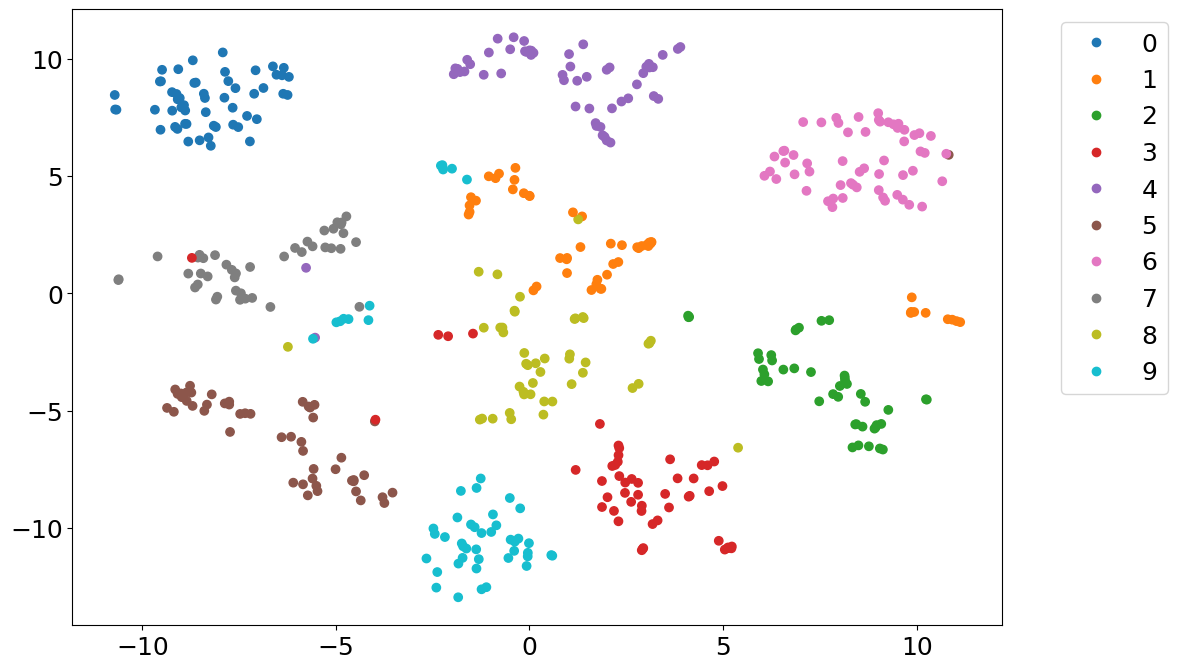

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_digits
import numpy as np
import tsnejax 


rcParams["font.size"] = 18
rcParams["figure.figsize"] = (12, 8)


digits, digit_class = load_digits(return_X_y=True)
rand_idx = np.random.choice(np.arange(digits.shape[0]), size=500, replace=False)
data = digits[rand_idx, :].copy()
classes = digit_class[rand_idx]

low_dim = tsnejax.compute_low_dimensional_embedding(data, 2, 30, 500, \
                                            100, pbar=True, use_ntk=False)


scatter = plt.scatter(low_dim[:, 0], low_dim[:, 1], cmap="tab10", c=classes)
plt.legend(*scatter.legend_elements(), fancybox=True, bbox_to_anchor=(1.05, 1))
plt.show()




In [2]:
import jax
import jax.numpy as jnp

# Get a list of available JAX devices (CPUs and GPUs)
devices = jax.devices()

# Check if there are any GPU devices available
gpu_devices = [device for device in devices if 'gpu' in device.device_kind.lower()]

if gpu_devices:
    # Choose the first GPU (you can select a specific GPU by index)
    selected_gpu = gpu_devices[0]
    print(f"Selected GPU Device: {selected_gpu}")

    # Set the JAX device to the selected GPU
    jax.device(selected_gpu)
else:
    print("No GPU devices available. Using CPU.")


No GPU devices available. Using CPU.
